In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
from math import pi
import plotly.express as px
from windrose import WindroseAxes
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits import mplot3d

In [24]:
spi_20 = pd.read_csv('spi_20.csv')

In [25]:
spi_20.head()

,March,pm,direction,speed
0,1,12.2,171,8.1
1,2,13.7,149,7.0
2,3,18.2,114,5.1
3,4,12.9,166,4.4
4,5,6.3,357,9.4


In [26]:
df4 = pd.DataFrame(spi_20)

In [7]:
df4

,March,PM 2.5 (µg/m³),direction,speed
0,1,12.2,171.0,8.1
1,2,13.7,149.0,7.0
2,3,18.2,114.0,5.1
3,4,12.9,166.0,4.4
4,5,6.3,357.0,9.4
5,6,9.0,25.0,4.8
6,7,10.0,97.0,5.0
7,8,13.6,133.0,8.0
8,9,12.9,135.0,5.2
9,10,14.0,133.0,4.4


In [8]:
from scipy import stats

In [3]:
stats.linregress?

Signature: stats.linregress(x, y=None)
Docstring:
Calculate a linear least-squares regression for two sets of measurements.

Parameters
----------
x, y : array_like
    Two sets of measurements.  Both arrays should have the same length.  If
    only `x` is given (and ``y=None``), then it must be a two-dimensional
    array where one dimension has length 2.  The two sets of measurements
    are then found by splitting the array along the length-2 dimension.  In
    the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
    equivalent to ``linregress(x[0], x[1])``.

Returns
-------
slope : float
    Slope of the regression line.
intercept : float
    Intercept of the regression line.
rvalue : float
    Correlation coefficient.
pvalue : float
    Two-sided p-value for a hypothesis test whose null hypothesis is
    that the slope is zero, using Wald Test with t-distribution of
    the test statistic.
stderr : float
    Standard error of the estimated gradient.

See also
---

In [27]:
df4.corr()

,March,pm,direction,speed
March,1.000000,0.525370,-0.172314,0.336390
pm,0.525370,1.000000,-0.303810,0.032675
direction,-0.172314,-0.303810,1.000000,0.494285
speed,0.336390,0.032675,0.494285,1.000000


In [28]:
np.corrcoef(df4["direction"],df4["pm"])

array([[ 1.       , -0.3038096],
       [-0.3038096,  1.       ]])

In [29]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df4["direction"],df4["pm"])

In [30]:
slope

-0.02182975401246215

In [31]:
intercept

17.124451034922874

In [32]:
r_value

-0.30380959501997035

In [33]:
p_value

0.09659980606750192

In [34]:
std_err

0.012712163216184336

Text(0, 0.5, 'PM 2.5(µg/m³)')

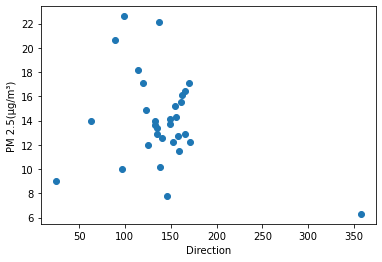

In [35]:
plt.scatter(df4["direction"], df4["pm"])
plt.xlabel('Direction')
plt.ylabel('PM 2.5(µg/m³)')

Text(0.5, 1.0, 'PM 2.5 and Wind Direction South Padre Island March 2020')

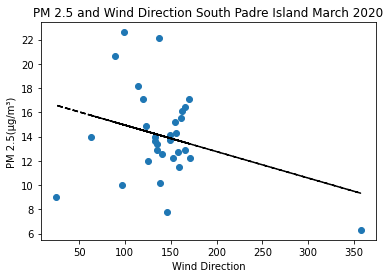

In [37]:
plt.plot(df4["direction"], slope*df4["direction"]+intercept, 'k--')
plt.scatter(df4["direction"], df4["pm"])
plt.xlabel('Wind Direction')
plt.ylabel('PM 2.5(µg/m³)')

plt.savefig('spi_pm&directcorr20')
plt.title('PM 2.5 and Wind Direction South Padre Island March 2020')

In [38]:
np.corrcoef(df4["speed"],df4["pm"])

array([[1.        , 0.03267494],
       [0.03267494, 1.        ]])

In [39]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df4["speed"],df4["pm"])

In [40]:
slope

0.056065357243468526

In [41]:
intercept

13.651497000457207

In [42]:
r_value

0.03267494329745556

In [43]:
p_value

0.8614752011598922

In [44]:
std_err

0.31845552697811547

Text(0, 0.5, 'PM 2.5(µg/m³)')

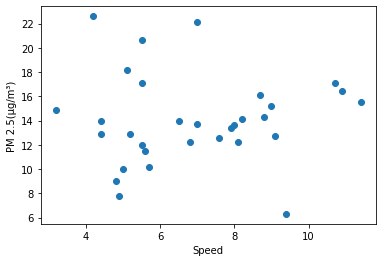

In [45]:
plt.scatter(df4["speed"], df4["pm"])
plt.xlabel('Speed')
plt.ylabel('PM 2.5(µg/m³)')

Text(0.5, 1.0, 'PM 2.5 and Wind Speed South Padre Island March 2020')

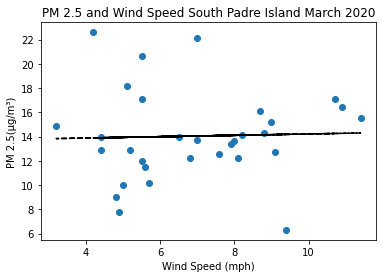

In [46]:
plt.plot(df4["speed"], slope*df4["speed"]+intercept, 'k--')
plt.scatter(df4["speed"], df4["pm"])
plt.xlabel('Wind Speed (mph)')
plt.ylabel('PM 2.5(µg/m³)')

plt.savefig('spi_pm&speedcorr20')
plt.title('PM 2.5 and Wind Speed South Padre Island March 2020')